In [19]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected import statement
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## **Run** **This** **Code** **to** **know** **about** **disease** **and** **it's** **segmentation** **and** **pixel**

In [18]:
import os
import tkinter as tk
from tkinter import filedialog, messagebox
import cv2
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model('eye_disease_classification_model.keras')
disease_classes = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Image preprocessing function
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return None
    image = cv2.resize(image, (224, 224))  # Adjust size to match your model's expected input
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Disease prediction function
def predict_disease(image_path):
    image = preprocess_image(image_path)
    if image is None:
        return "Error loading image"
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions, axis=1)
    return disease_classes[predicted_class[0]]

# Basic segmentation function (replace with actual segmentation logic)
def basic_segmentation(image_path):
    try:
        original_image = cv2.imread(image_path)
        if original_image is None:
            print(f"Error: Unable to load image {image_path}")
            return None, None, 0
        
        # Example segmentation process
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        _, segmented_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        num_segmented_pixels = cv2.countNonZero(segmented_image)

        return original_image, segmented_image, num_segmented_pixels
    except Exception as e:
        print(f"Exception occurred during segmentation of {image_path}: {e}")
        return None, None, 0

# Function to load and process the image
def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        disease_name = predict_disease(file_path)
        original_image, segmented_image, num_segmented_pixels = basic_segmentation(file_path)
        if original_image is not None:
            display_images(disease_name, original_image, segmented_image, num_segmented_pixels)
        else:
            messagebox.showerror("Error", "Unable to process the image.")
    else:
        messagebox.showwarning("Warning", "No file selected.")

# Function to display the original and segmented images along with the disease name
def display_images(disease_name, original_image, segmented_image, num_segmented_pixels):
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image = Image.fromarray(original_image)
    original_image = ImageTk.PhotoImage(original_image)
    
    segmented_image = Image.fromarray(segmented_image)
    segmented_image = ImageTk.PhotoImage(segmented_image)

    panel_original.configure(image=original_image)
    panel_original.image = original_image
    
    panel_segmented.configure(image=segmented_image)
    panel_segmented.image = segmented_image

    label_result.configure(text=f"Disease: {disease_name}\nSegmented Pixels: {num_segmented_pixels}")

# Create the main window
root = tk.Tk()
root.title("Disease Segmentation")
root.geometry("900x600")
root.config(bg="#f0f0f0")

# Create a stylish frame for the images
frame = tk.Frame(root, bg="#ffffff", bd=2, relief=tk.RIDGE)
frame.pack(pady=20, padx=20, fill=tk.BOTH, expand=True)

# Original image panel
panel_original = tk.Label(frame, bg="#f0f0f0")
panel_original.grid(row=0, column=0, padx=20, pady=20)

# Segmented image panel
panel_segmented = tk.Label(frame, bg="#f0f0f0")
panel_segmented.grid(row=0, column=1, padx=20, pady=20)

# Result label
label_result = tk.Label(root, text="Disease: N/A\nSegmented Pixels: N/A", font=("Helvetica", 16), bg="#f0f0f0", bd=1, relief=tk.SOLID)
label_result.pack(pady=10)

# Load image button
btn_load_image = tk.Button(root, text="Load Image", command=load_image, font=("Helvetica", 14), bg="#4caf50", fg="white", bd=1, relief=tk.RAISED)
btn_load_image.pack(pady=20)

# Run the application
root.mainloop()


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 10 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 6 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


## **Preprocessing**

In [25]:
# Define rescaling layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load train resized_resized_dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess train resized_resized_dataset (rescale)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation resized_resized_dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess validation resized_resized_dataset (rescale)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))

# Load test resized_resized_dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\Admin\Desktop\Infosys\Grishma_Vadadoria_Project\Milestones\dataset',  # Specify the directory for the test resized_resized_dataset
    batch_size=32,
    image_size=(256, 256),
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False,
)

# Preprocess test resized_dataset (rescale)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 4217 files belonging to 4 classes.
Using 3374 files for training.
Found 4217 files belonging to 4 classes.
Using 843 files for validation.
Found 4217 files belonging to 4 classes.


## **Check Shape After Preprocessing**

In [26]:
# Check the first image shape in the training resized_resized_dataset
print("Shape of the first image in the training dataset:", next(iter(train_ds))[0][0].shape)
# Check the first image shape in the validation resized_resized_dataset
print("Shape of the first image in the validation dataset:", next(iter(validation_ds))[0][0].shape)
# Check the first image shape in the test resized_resized_dataset
print("Shape of the first image in the test dataset:", next(iter(test_ds))[0][0].shape)

Shape of the first image in the training dataset: (256, 256, 3)
Shape of the first image in the validation dataset: (256, 256, 3)
Shape of the first image in the test dataset: (256, 256, 3)


## **Check Pixel Value After Preprocessing**

In [27]:
# Initialize variables to store minimum and maximum pixel values
min_pixel_value = float('inf')
max_pixel_value = float('-inf')

# Iterate through the resized_resized_dataset
for images, _ in train_ds:
    # Compute the minimum and maximum pixel values in the current batch of images
    batch_min = tf.reduce_min(images)
    batch_max = tf.reduce_max(images)
    
    # Update overall minimum and maximum pixel values
    min_pixel_value = tf.minimum(min_pixel_value, batch_min)
    max_pixel_value = tf.maximum(max_pixel_value, batch_max)

# Print the minimum and maximum pixel values
print("Minimum pixel value:", min_pixel_value.numpy())
print("Maximum pixel value:", max_pixel_value.numpy())


Minimum pixel value: 0.0
Maximum pixel value: 1.0


## **Visualization**
         


In [28]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [29]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


## **Cataract**

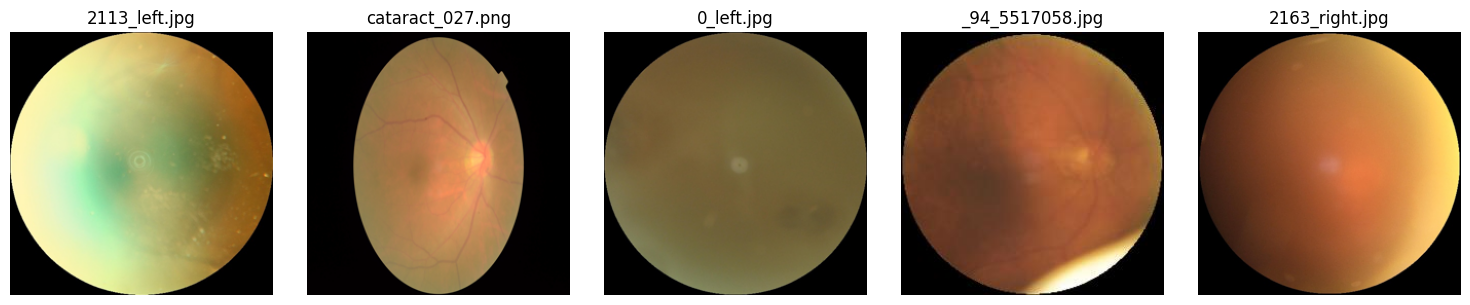

In [19]:
# Specify the path containing the images to visualize
path_to_visualize = "C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset\\cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Diabetic Retinopathy**

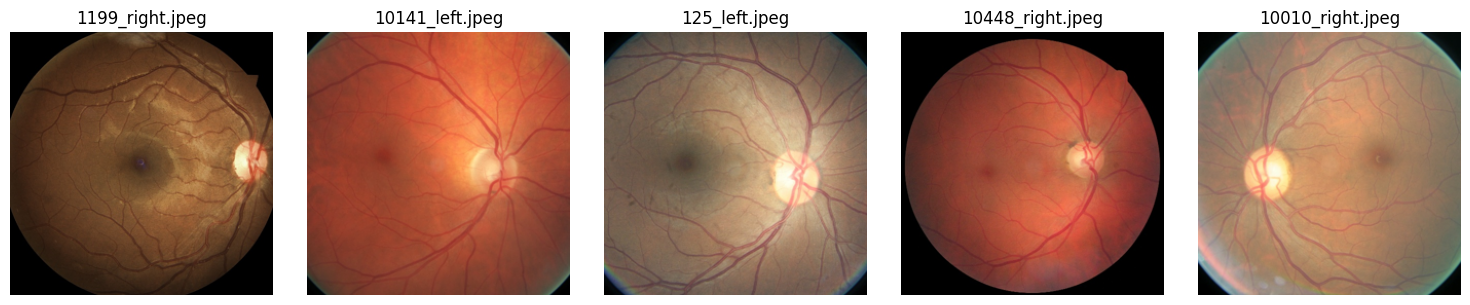

In [20]:
# Specify the path containing the images to visualize
path_to_visualize = "C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset\\diabetic_retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Glaucoma**

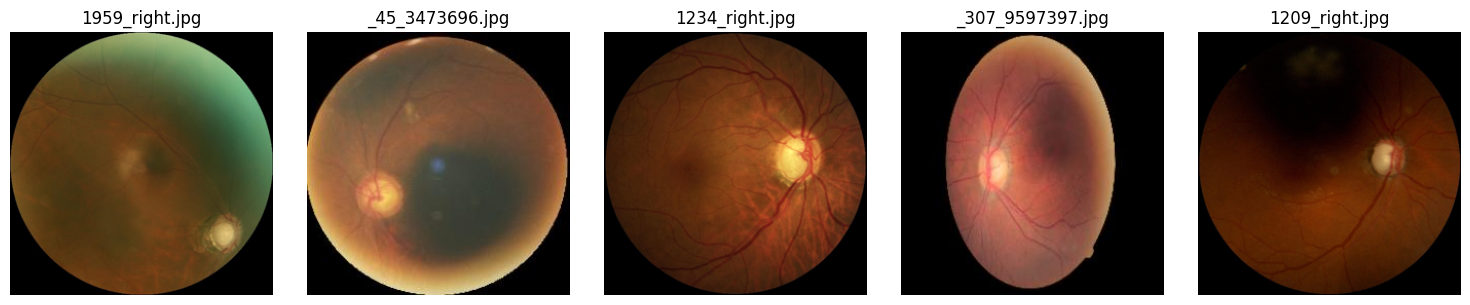

In [21]:
# Specify the path containing the images to visualize
path_to_visualize = "C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset\\glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Normal**

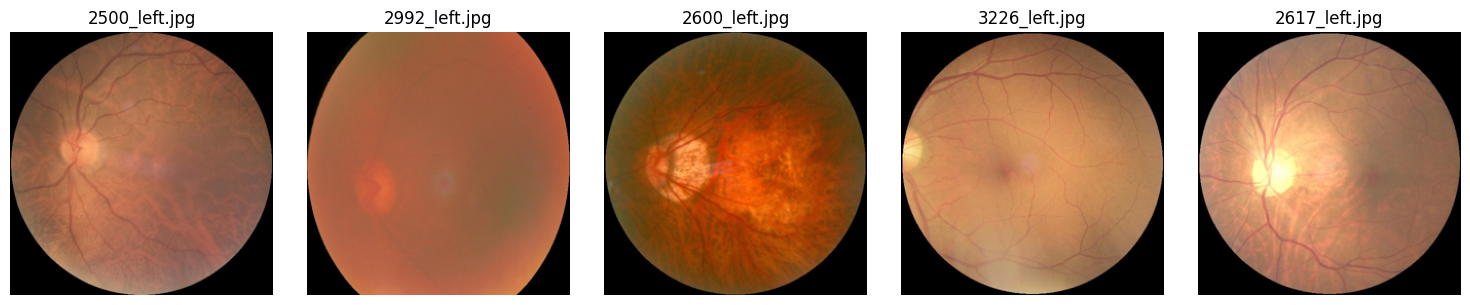

In [22]:
# Specify the path containing the images to visualize
path_to_visualize = "C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset\\normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

## **Image Segmentation**

In [38]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import warnings

warnings.filterwarnings('ignore')

# Define directories and parameters
base_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset'
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
image_size = (256, 256)
batch_size = 16

# Data augmentation parameters
data_gen_args = dict(rescale=1./255, 
                     rotation_range=20,
                     width_shift_range=0.2,
                     height_shift_range=0.2,
                     shear_range=0.2,
                     zoom_range=0.2,
                     horizontal_flip=True,
                     fill_mode='nearest')

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Function to create a data generator
def create_data_generator(base_dir, class_names, image_datagen, mask_datagen, target_size, batch_size):
    data_gen_list = []
    for class_name in class_names:
        image_generator = image_datagen.flow_from_directory(
            os.path.join(base_dir, class_name),
            classes=['images'],
            class_mode=None,
            color_mode='rgb',  # Ensure RGB images
            target_size=target_size,
            batch_size=batch_size,
            seed=123)

        mask_generator = mask_datagen.flow_from_directory(
            os.path.join(base_dir, class_name),
            classes=['masks'],
            class_mode=None,
            color_mode='grayscale',  # Ensure grayscale masks
            target_size=target_size,
            batch_size=batch_size,
            seed=123)

        data_gen_list.append((image_generator, mask_generator))
    
    return data_gen_list

# Create data generators for each class
data_gen_list = create_data_generator(base_dir, class_names, image_datagen, mask_datagen, image_size, batch_size)

# Define U-Net model
def unet_model(input_size=(256, 256, 3)):  # Expecting RGB images
    inputs = keras.Input(shape=input_size)

    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = keras.Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
def combine_generators(data_gen_list):
    while True:
        for image_gen, mask_gen in data_gen_list:
            image_batch, mask_batch = next(image_gen), next(mask_gen)
            print(f"Image batch shape: {image_batch.shape}, Mask batch shape: {mask_batch.shape}")
            yield image_batch, mask_batch

In [40]:
def create_data_generators(base_dir, image_datagen, mask_datagen, image_size, batch_size, class_names):
    image_generator = image_datagen.flow_from_directory(
        base_dir,
        classes='images',
        class_mode=None,
        color_mode='rgb',
        target_size=image_size,
        batch_size=batch_size,
        seed=123
    )

    mask_generator = mask_datagen.flow_from_directory(
        base_dir,
        classes='mask',
        class_mode=None,
        color_mode='grayscale',
        target_size=image_size,
        batch_size=batch_size,
        seed=123,
        interpolation='nearest'  # Ensure masks are loaded without interpolation
    )

    return image_generator, mask_generator


In [41]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings

warnings.filterwarnings('ignore')

In [42]:
# Define directories and parameters
base_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset'
image_size = (256, 256)
batch_size = 32


In [43]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',  # Set as training data
    seed=123
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Set as validation data
    seed=123
)


Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.


In [44]:
# Define the CNN model
model = Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,945,412 (129.49 MB)

 Trainable params: 33,945,412 (129.49 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define data directories and parameters
data_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset'
batch_size = 32
img_size = (224, 224)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # 20% of the data will be used for validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(4, activation='softmax')(x)  # 4 classes for 4 types of eye diseases
model = Model(inputs=base_model.input, outputs=predictions)

# Enable mixed precision training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Increase epochs for better accuracy
    callbacks=[early_stopping, reduce_lr, tensorboard_callback]
)

# Save the trained model in the recommended format
model.save('eye_disease_classification_model.keras')

# Evaluate the model on validation data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {test_loss}")
print(f"Validation Accuracy: {test_accuracy}")


Found 3376 images belonging to 4 classes.
Found 841 images belonging to 4 classes.
Epoch 1/50


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


106/106 ━━━━━━━━━━━━━━━━━━━━ 335s 3s/step - accuracy: 0.4829 - loss: 1.2590 - val_accuracy: 0.6623 - val_loss: 0.8305 - learning_rate: 0.0010
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7180 - loss: 0.7271 - val_accuracy: 0.6849 - val_loss: 0.8180 - learning_rate: 0.0010
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.7525 - loss: 0.6160 - val_accuracy: 0.6920 - val_loss: 0.7858 - learning_rate: 0.0010
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7745 - loss: 0.5680 - val_accuracy: 0.6659 - val_loss: 0.9093 - learning_rate: 0.0010
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7657 - loss: 0.5845 - val_accuracy: 0.6801 - val_loss: 0.7842 - learning_rate: 0.0010
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7915 - loss: 0.5566 - val_accuracy: 0.6968 - val_loss: 0.7845 - learning_rate: 0.0010
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8088 - loss: 0.5122 - val_

In [5]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7525 - loss: 0.6529
Validation Loss: 0.6759283542633057
Validation Accuracy: 0.7360285520553589


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


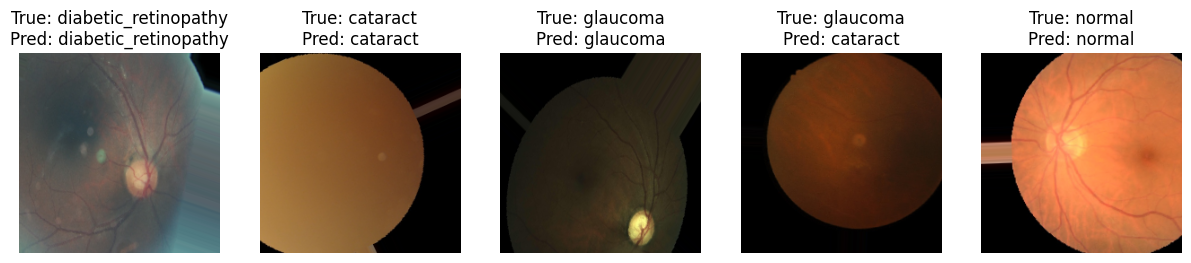

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(generator, model, num_images=5):
    class_labels = list(generator.class_indices.keys())
    images, labels = next(generator)
    predictions = model.predict(images)
    
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        true_label = class_labels[np.argmax(labels[i])]
        predicted_label = class_labels[np.argmax(predictions[i])]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Visualize predictions on a batch of images from the validation set
visualize_predictions(validation_generator, model)


In [7]:
import tensorflow as tf

# Assume 'model' is your trained model
# Save the trained model using the native Keras format with .keras extension
model.save('eye_disease_classification_model.keras')


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories and parameters
base_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset'
image_size = (224, 224)  # Adjusted target_size to match model input size
batch_size = 16

# Load the test dataset using ImageDataGenerator
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Assuming 'model' is your trained model
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 4217 images belonging to 4 classes.
264/264 ━━━━━━━━━━━━━━━━━━━━ 114s 430ms/step - accuracy: 0.7477 - loss: 0.7066
Test Loss: 0.6875636577606201
Test Accuracy: 0.7514820694923401


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories and parameters
base_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset'
image_size = (224, 224)  # Adjusted target_size to match model input size
batch_size = 16

# Load the test dataset using ImageDataGenerator
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    directory=base_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Assuming 'model' is your trained model
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Found 4217 images belonging to 4 classes.
264/264 ━━━━━━━━━━━━━━━━━━━━ 116s 437ms/step - accuracy: 0.7477 - loss: 0.7066
Test Loss: 0.6875636577606201
Test Accuracy: 0.7514820694923401


Visualizing images from class: cataract


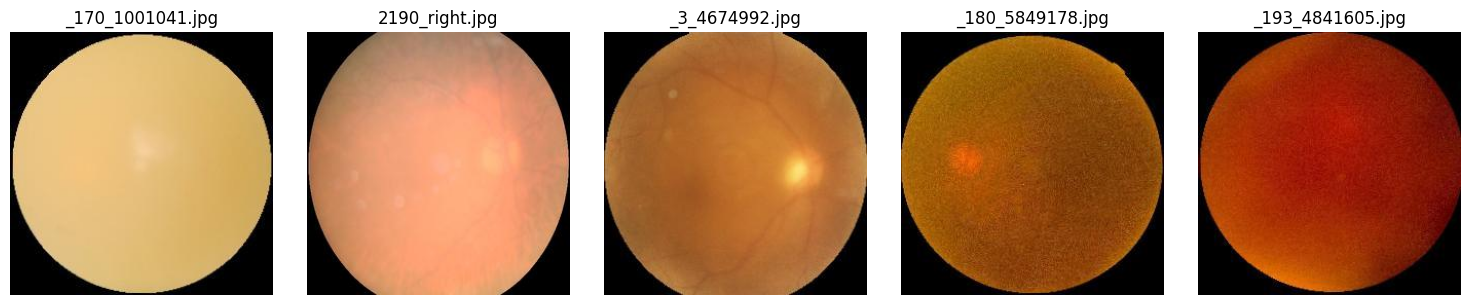

Visualizing images from class: diabetic_retinopathy


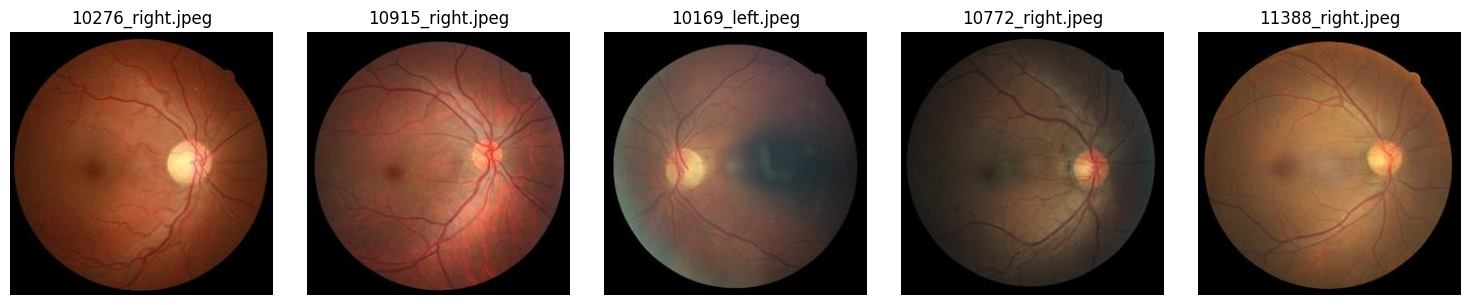

Visualizing images from class: glaucoma


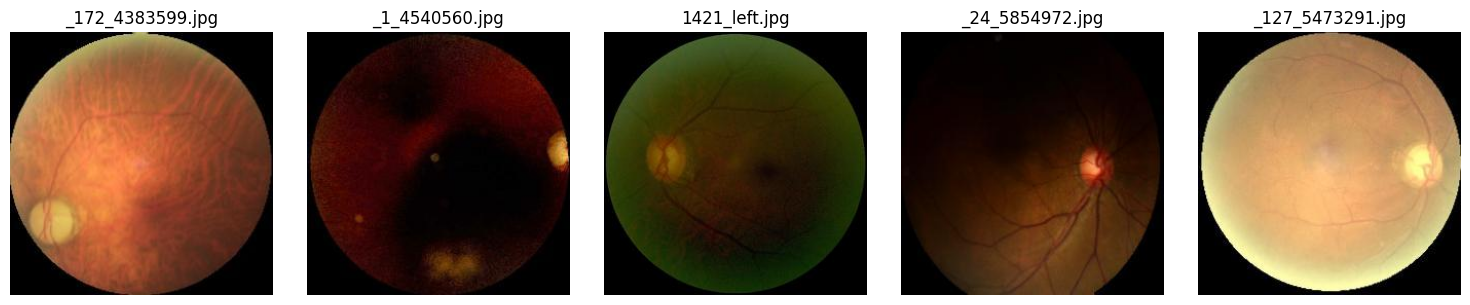

Visualizing images from class: normal


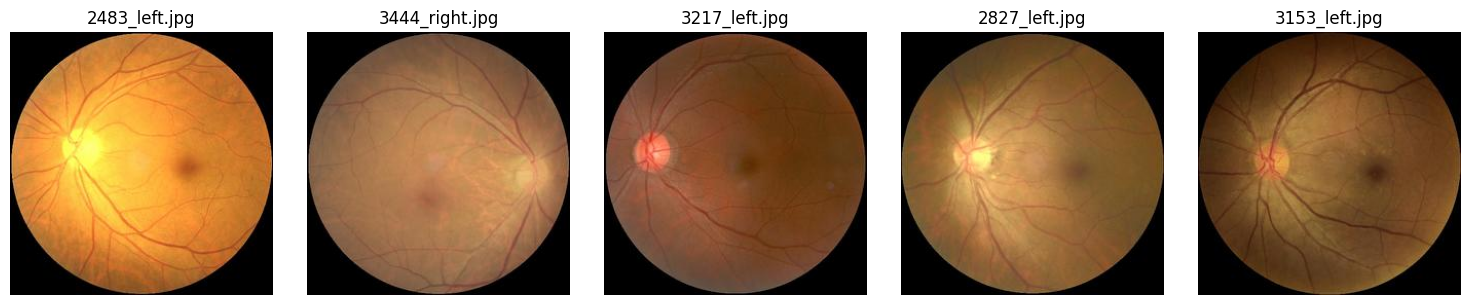

Segmenting image from class: cataract - _228_4231065.jpg


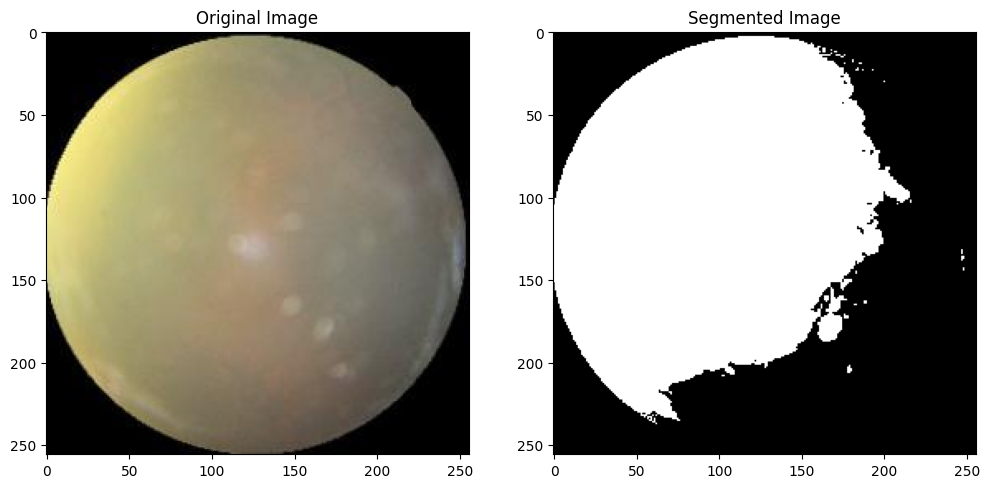

Segmenting image from class: diabetic_retinopathy - 11446_right.jpeg


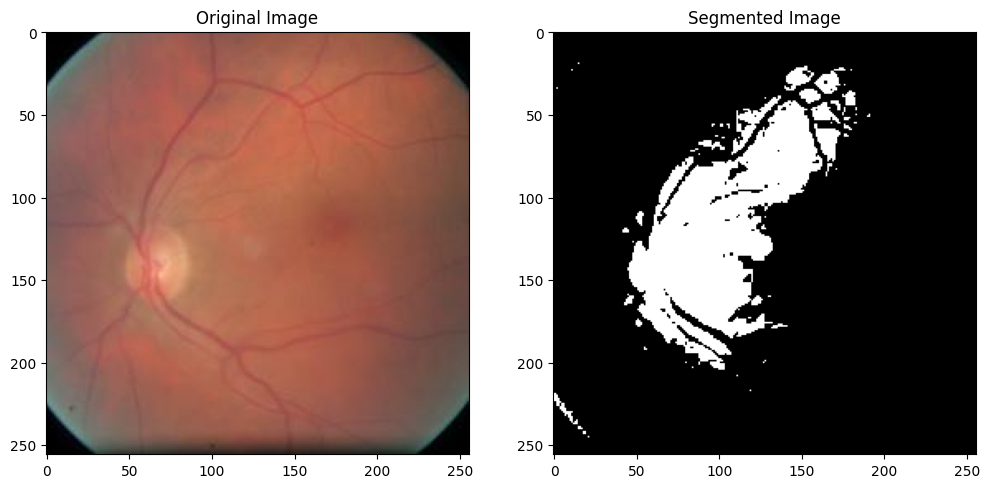

Segmenting image from class: glaucoma - _29_2615629.jpg


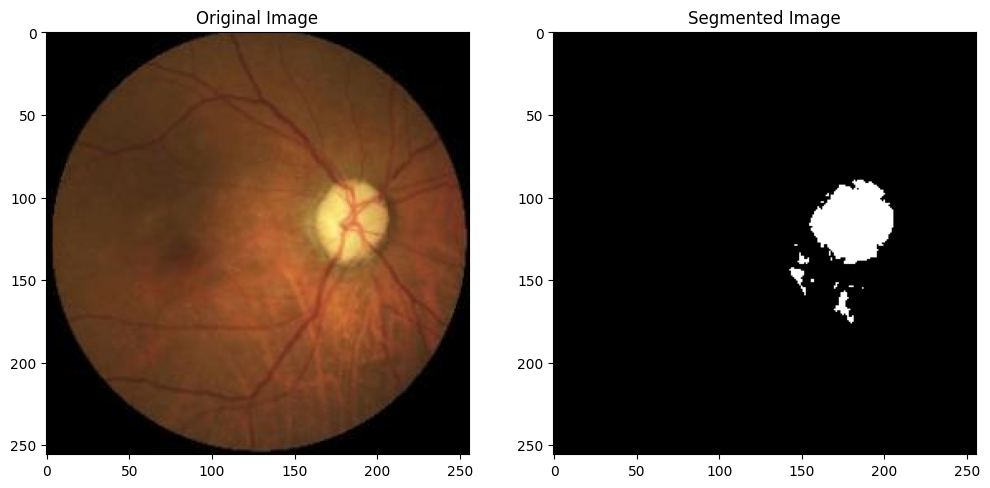

Segmenting image from class: normal - 2482_right.jpg


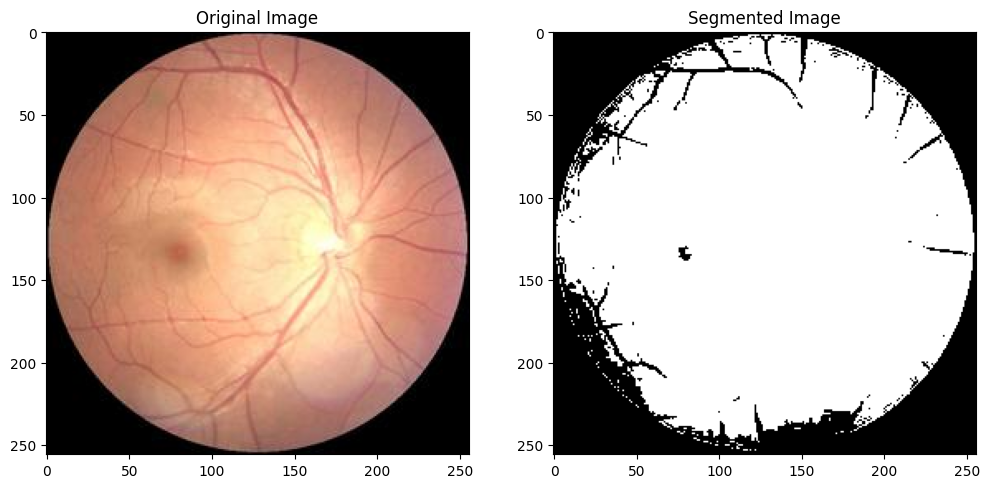

In [11]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define function to visualize images
def visualize_images(path, target_size=(256, 256), num_images=5):
    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    if not image_filenames:
        raise ValueError("No images found in the specified path")
    
    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))
    
    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')
    
    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)
        
        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Define function for basic image segmentation
def basic_segmentation(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    
    # Normalize image
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary threshold
    _, segmented_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    
    # Display original and segmented images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    
    plt.show()

# Define resized_resized_dataset directory
resized_resized_dataset_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\resized_dataset'

# Visualize random images from each class
for class_name in ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']:
    class_dir = os.path.join(resized_resized_dataset_dir, class_name)
    print(f"Visualizing images from class: {class_name}")
    visualize_images(class_dir, num_images=5)

# Apply basic segmentation to a random image from each class
for class_name in ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']:
    class_dir = os.path.join(resized_resized_dataset_dir, class_name)
    image_filename = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, image_filename)
    print(f"Segmenting image from class: {class_name} - {image_filename}")
    basic_segmentation(image_path)


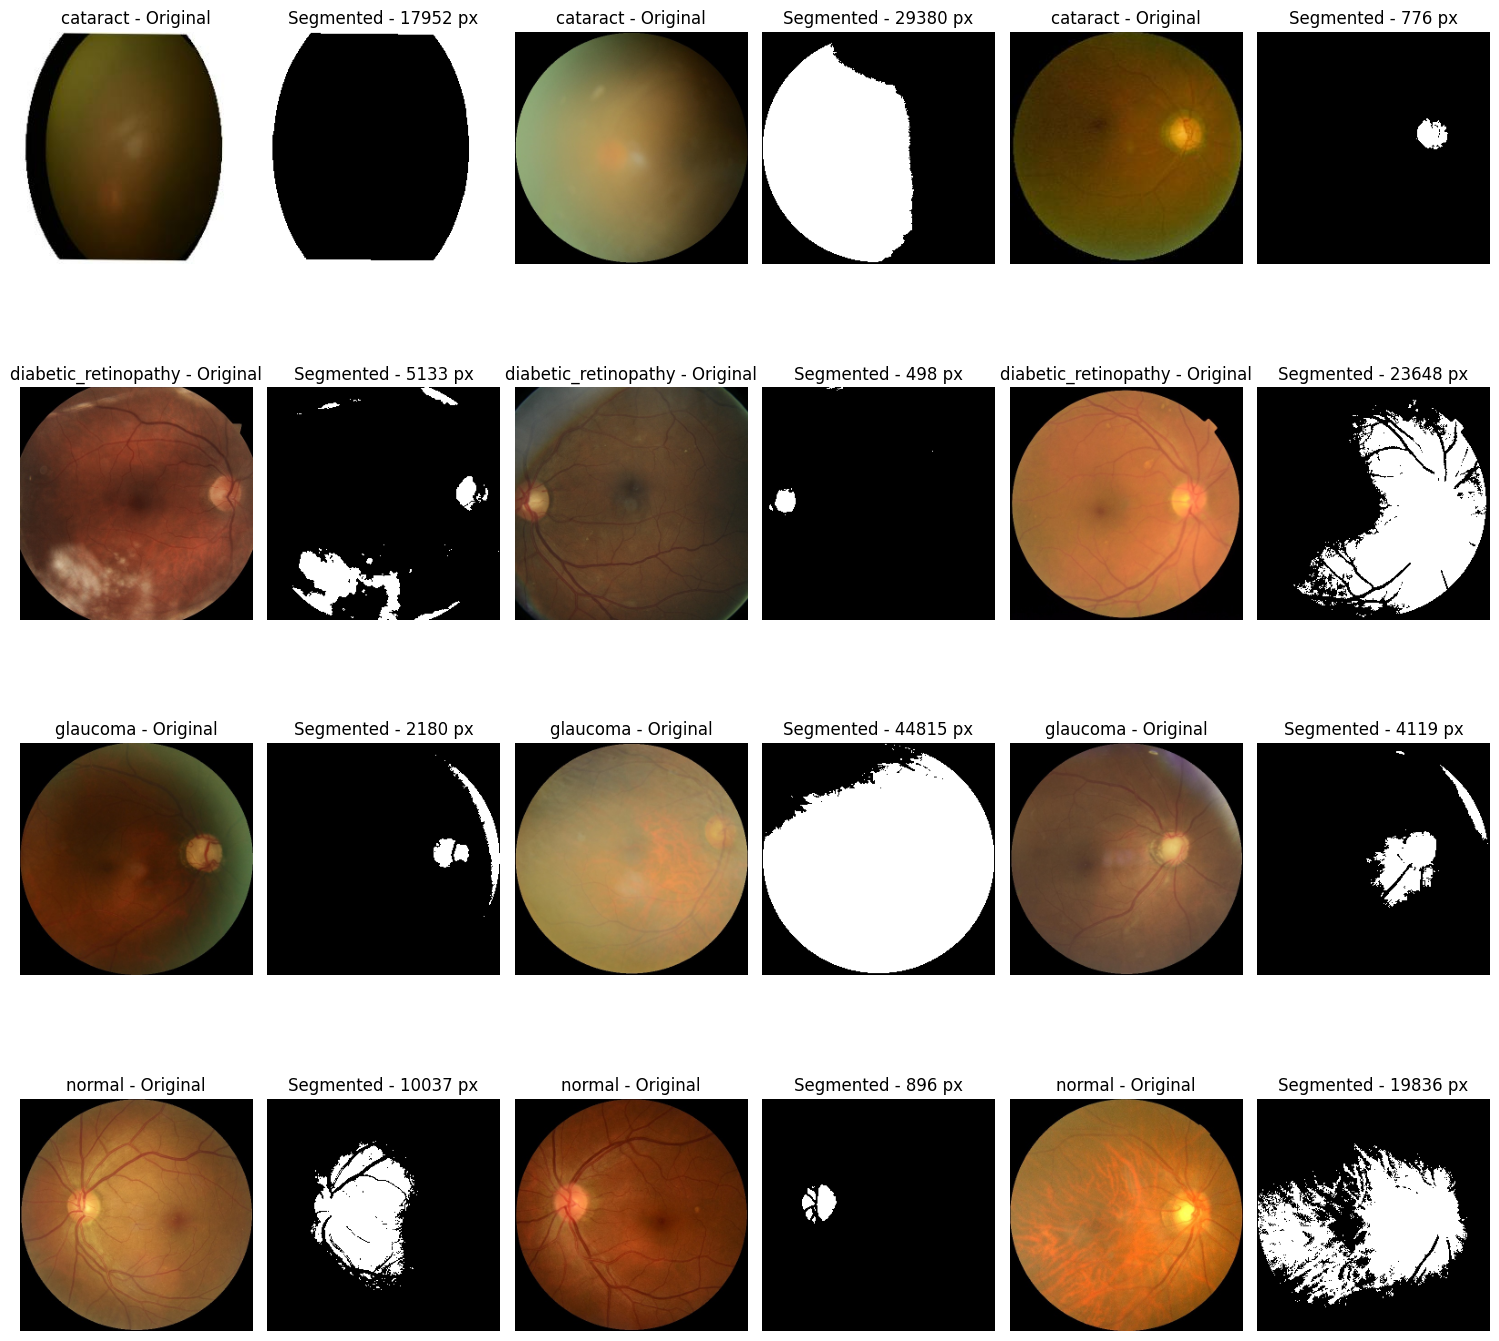

In [12]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define function to visualize images
def visualize_images(path, target_size=(256, 256), num_images=5):
    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    if not image_filenames:
        raise ValueError("No images found in the specified path")
    
    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))
    
    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')
    
    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)
        
        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Define function for basic image segmentation and statistics
def basic_segmentation(image_path):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    
    # Normalize image
    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary threshold
    _, segmented_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    
    # Calculate number of segmented pixels
    num_segmented_pixels = np.sum(segmented_image == 255)
    
    return image, segmented_image, num_segmented_pixels

# Define resized_resized_dataset directory
resized_resized_dataset_dir = 'C:\\Users\\Admin\\Desktop\\Infosys\\Grishma_Vadadoria_Project\\Milestones\\dataset'

# Function to plot original and segmented images with statistics
def plot_segmentation_results(resized_resized_dataset_dir, class_names, num_images=3):
    fig, axes = plt.subplots(len(class_names), num_images*2, figsize=(15, 15), facecolor='white')
    
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(resized_resized_dataset_dir, class_name)
        image_filenames = random.sample(os.listdir(class_dir), num_images)
        
        for j, image_filename in enumerate(image_filenames):
            image_path = os.path.join(class_dir, image_filename)
            original_image, segmented_image, num_segmented_pixels = basic_segmentation(image_path)
            
            axes[i, j*2].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            axes[i, j*2].axis('off')
            axes[i, j*2].set_title(f"{class_name} - Original")
            
            axes[i, j*2+1].imshow(segmented_image, cmap='gray')
            axes[i, j*2+1].axis('off')
            axes[i, j*2+1].set_title(f"Segmented - {num_segmented_pixels} px")
    
    plt.tight_layout()
    plt.show()

# Class names in the resized_resized_dataset
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']

# Plot segmentation results
plot_segmentation_results(resized_resized_dataset_dir, class_names, num_images=3)


In [13]:
import os
import tkinter as tk
from tkinter import filedialog, messagebox
import cv2
from PIL import Image, ImageTk
import random

def basic_segmentation(image_path):
    try:
        original_image = cv2.imread(image_path)
        if original_image is None:
            print(f"Error: Unable to load image {image_path}")
            return None
        
        # Example segmentation process (this should be replaced with actual segmentation logic)
        gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        _, segmented_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        num_segmented_pixels = cv2.countNonZero(segmented_image)

        return original_image, segmented_image, num_segmented_pixels
    except Exception as e:
        print(f"Exception occurred during segmentation of {image_path}: {e}")
        return None

def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        original_image, segmented_image, num_segmented_pixels = basic_segmentation(file_path)
        if original_image is not None:
            display_images(original_image, segmented_image, num_segmented_pixels)
        else:
            messagebox.showerror("Error", "Unable to process the image.")
    else:
        messagebox.showwarning("Warning", "No file selected.")

def display_images(original_image, segmented_image, num_segmented_pixels):
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image = Image.fromarray(original_image)
    original_image = ImageTk.PhotoImage(original_image)
    
    segmented_image = Image.fromarray(segmented_image)
    segmented_image = ImageTk.PhotoImage(segmented_image)

    panel_original.configure(image=original_image)
    panel_original.image = original_image
    
    panel_segmented.configure(image=segmented_image)
    panel_segmented.image = segmented_image

    label_result.configure(text=f"Segmented Pixels: {num_segmented_pixels}")

# Create the main window
root = tk.Tk()
root.title("Disease Segmentation")
root.geometry("800x600")

# Create a frame for the images
frame = tk.Frame(root)
frame.pack(pady=20)

# Original image panel
panel_original = tk.Label(frame)
panel_original.grid(row=0, column=0, padx=10, pady=10)

# Segmented image panel
panel_segmented = tk.Label(frame)
panel_segmented.grid(row=0, column=1, padx=10, pady=10)

# Result label
label_result = tk.Label(root, text="Segmented Pixels: N/A", font=("Helvetica", 16))
label_result.pack(pady=20)

# Load image button
btn_load_image = tk.Button(root, text="Load Image", command=load_image)
btn_load_image.pack(pady=20)

# Run the application
root.mainloop()


In [16]:
import numpy as np
import cv2
from PIL import Image

def preprocess_image_with_segmentation(image):
    # Convert to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    # Apply segmentation (simple thresholding example)
    _, segmented = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Combine segmented with original image for input
    image = image.resize((224, 224))
    segmented = cv2.resize(segmented, (224, 224))

    img = np.array(image) / 255.0
    segmented = segmented / 255.0
    combined = np.stack((img, img, segmented), axis=-1)
    
    combined = np.expand_dims(combined, axis=0)
    return combined


In [44]:
import os
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2

# Suppress AVX2 FMA warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Load your trained model
@st.cache_resource
def load_model():
    try:
        model = tf.keras.models.load_model('C://Users//Admin//Desktop//Infosys//Grishma_Vadadoria_Project//Milestones//eye_disease_classification_model.keras')
        # Compile the model with necessary metrics
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None

model = load_model()

# Preprocessing function with segmentation
def preprocess_image_with_segmentation(image):
    try:
        gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
        _, segmented = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        image = image.resize((224, 224))
        segmented = cv2.resize(segmented, (224, 224))
        img = np.array(image) / 255.0
        segmented = segmented / 255.0
        combined = np.stack((img, img, segmented), axis=-1)
        combined = np.expand_dims(combined, axis=0)
        return combined
    except Exception as e:
        st.error(f"Error in preprocessing: {e}")
        return None

# Main interface
st.set_page_config(page_title="Eye Disease Detection", layout="wide")

st.title("👁️ Eye Disease Detection with Segmentation")
st.write("""
    Welcome to the Eye Disease Detection app. Upload an eye image to detect potential eye diseases. The app uses a convolutional neural network (CNN) to analyze the images with additional preprocessing and segmentation steps.
""")

# File uploader
uploaded_file = st.file_uploader("Choose an eye image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    with st.spinner('Processing...'):
        img = preprocess_image_with_segmentation(image)
        if img is not None:
            # Predict the disease
            with st.spinner('Predicting...'):
                try:
                    prediction = model.predict(img)
                    pred_class = np.argmax(prediction, axis=1)[0]
                    class_labels = ["Disease 1", "Disease 2", "Disease 3", "Disease 4"]
                    st.success(f'Predicted Class: {class_labels[pred_class]}')
                    st.write(f'Prediction Confidence: {prediction[0][pred_class]:.2f}')
                except Exception as e:
                    st.error(f"Error in prediction: {e}")
        else:
            st.error("Preprocessing failed.")

# Sidebar for additional information
st.sidebar.title("About")
st.sidebar.markdown("""
    This app uses a convolutional neural network (CNN) to detect eye diseases from images. The model was trained on the APTOS 2019 Blindness Detection dataset with additional preprocessing and segmentation.
    For more information, visit the [GitHub Repository](https://github.com/Springboard-Internship-2024/MediScan-AI-Powered-Medical-Image-Analysis-for-Disease-Diagnosis_May_2024/blob/Grishma/Preprocessing%20with%20image%20segmentation.ipynb).
""")

# Footer
st.markdown(
    """
    <style>
    .footer {
        position: fixed;
        left: 0;
        bottom: 0;
        width: 100%;
        background-color: #f1f1f1;
        text-align: center;
        padding: 10px;
    }
    </style>
    <div class="footer">
        <p>Developed by Grishma Vadadoria | © 2024 Infosys</p>
    </div>
    """,
    unsafe_allow_html=True
)


DeltaGenerator()

In [41]:
%pip install streamlit pillow numpy tensorflow opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [33]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [26]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    # Assume data contains preprocessed image
    img = np.array(data['image'])
    prediction = model.predict(img)
    pred_class = np.argmax(prediction, axis=1)[0]
    return jsonify({'predicted_class': int(pred_class), 'confidence': float(prediction[0][pred_class])})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.183.100:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/Jul/2024 13:24:27] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Jul/2024 13:24:44] "GET /favicon.ico HTTP/1.1" 404 -


In [27]:
import requests

# Predict the disease
with st.spinner('Predicting...'):
    try:
        response = requests.post('http://localhost:5000/predict', json={'image': img.tolist()})
        result = response.json()
        st.success(f'Predicted Class: {result["predicted_class"]}')
        st.write(f'Prediction Confidence: {result["confidence"]:.2f}')
    except Exception as e:
        st.error(f"Error in prediction: {e}")
